In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
c = pd.get_dummies(df['country'],prefix='country')
g = pd.get_dummies(df['gender'])
df = df.drop(['customer_id','country','gender'], axis='columns')
df = pd.concat([df,c,g],axis='columns')
df.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
X = df.drop(['churn'], axis='columns')
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#y_pred = [0 for _ in X_test]

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1706  663]
 [ 189  442]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2369
           1       0.40      0.70      0.51       631

    accuracy                           0.72      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.72      0.74      3000



In [7]:
model.coef_

array([[-0.27305028,  5.39886255, -0.20502564,  0.7091791 , -0.21115721,
        -0.03418736, -0.91666553,  0.10072688, -0.47838754,  0.27664649,
        -0.44275893, -0.05740746, -0.58709252]])

In [8]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain', 'Female', 'Male'],
      dtype='object')

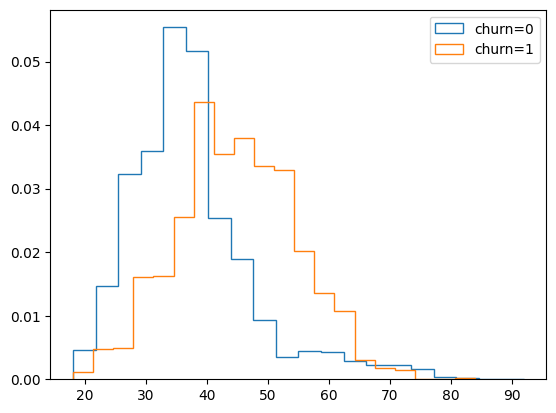

In [9]:
# vogliamo vedere la distribuzione delle età di chi ha churn=1 
# e la distribuzione delle età di chi ha churn=0

plt.hist(df[df["churn"] == 0]["age"], density=True, histtype='step', bins=20, label='churn=0')
plt.hist(df[df["churn"] == 1]["age"], density=True, histtype='step', bins=20, label='churn=1')
plt.legend(loc='best')
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_33180\25998727.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()
C:\Users\marco\AppData\Local\Temp\ipykernel_33180\25998727.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()


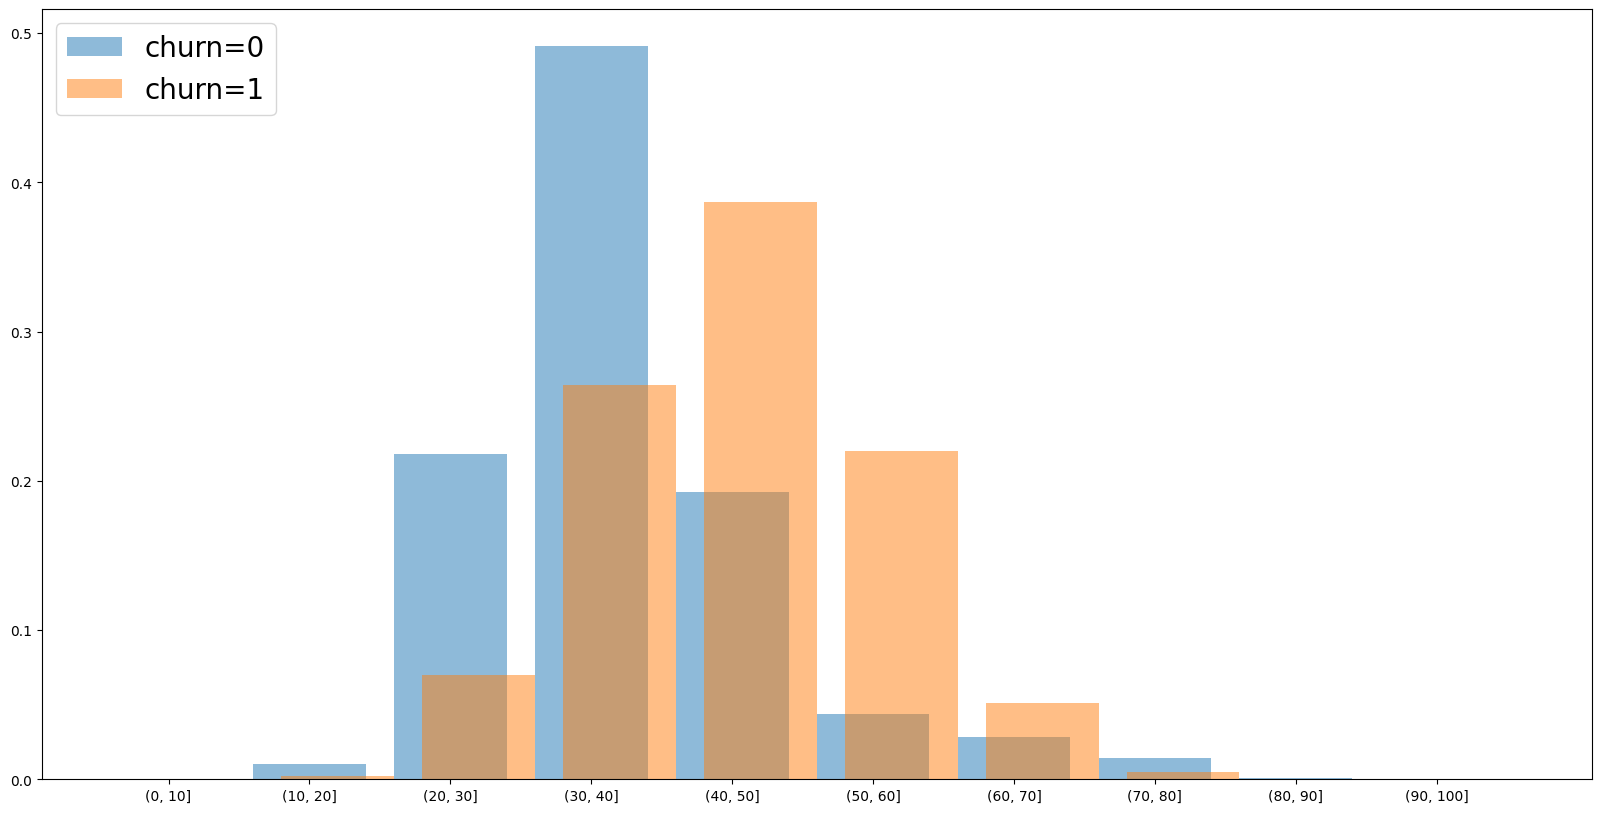

In [10]:
def get_agebin(df):
    df['agegroup'] = pd.cut(df['age'], range(0,110,10))
    gdf = df.groupby(['agegroup'])[['churn']].aggregate({'churn':[np.size]}).reset_index()
    gdf.columns = ['agegroup','size']
    gdf['size'] = gdf['size'] / gdf['size'].sum()
    return gdf

df0 = df.loc[df['churn']==0,:]
df1 = df.loc[df['churn']==1,:]
gdf0 = get_agebin(df0.copy())
gdf1 = get_agebin(df1.copy())
x0 = [i for i in range(gdf0.shape[0])]
x1 = [i+0.2 for i in range(gdf1.shape[0])]
plt.figure(figsize=(20,10))
plt.bar(x0,gdf0['size'], alpha=0.5, label='churn=0')
plt.bar(x1,gdf1['size'], alpha=0.5, label='churn=1')
plt.xticks(x0, gdf0['agegroup'].astype('str'))
plt.legend(loc='upper left', prop = { "size": 20 })
plt.show()
